In [1]:
# Run if you want to get rid of water, leave only protein and make the molecules whole
! echo 1 | gmx trjconv -f ../dynamic.xtc -s ../dynamic.tpr -o vars/unwrapped_no_water.xtc -pbc nojump # make the molecules whole again!
! echo 1 | gmx trjconv -f ../dynamic.gro -s ../dynamic.tpr -o vars/unwrapped_no_water.gro -pbc nojump

               :-) GROMACS - gmx trjconv, 2024.2-conda_forge (-:

Executable:   /opt/conda/envs/gromacs/bin.AVX2_256/gmx
Data prefix:  /opt/conda/envs/gromacs
Working dir:  /home/alexeyk/Desktop/simulations/Finished/serf_peg/MDanal
Command line:
  gmx trjconv -f ../dynamic.xtc -s ../dynamic.tpr -o vars/unwrapped_no_water.xtc -pbc nojump

Note that major changes are planned in future for trjconv, to improve usability and utility.
Will write xtc: Compressed trajectory (portable xdr format): xtc
Reading file ../dynamic.tpr, VERSION 2024.2-conda_forge (single precision)
Reading file ../dynamic.tpr, VERSION 2024.2-conda_forge (single precision)
Select group for output
Group     0 (         System) has 230186 elements
Group     1 (        Protein) has  6450 elements
Group     2 (      Protein-H) has  6450 elements
Group     3 (        C-alpha) has     0 elements
Group     4 (       Backbone) has     0 elements
Group     5 (      MainChain) has     0 elements
Group     6 (   MainChain+Cb) has

In [2]:
import MDAnalysis as mda
import MDAnalysis.analysis.msd as msd
from MDAnalysis.tests.datafiles import RANDOM_WALK_TOPO, RANDOM_WALK
u = mda.Universe(RANDOM_WALK_TOPO, RANDOM_WALK)
MSD = msd.EinsteinMSD(u, select='all', msd_type='xyz', fft=True)
u2= mda.Universe("vars/unwrapped_no_water.gro", "vars/unwrapped_no_water.xtc")

NUM_RES = 59
NUM_PROTEINS = 50
PROTEIN_LEN = 129

proteins = []

# this selects all 50 atoms
for i in range(NUM_PROTEINS):
    max_atoms = NUM_PROTEINS * PROTEIN_LEN
    start_index = i * PROTEIN_LEN + 1
    end_index = (i + 1) * PROTEIN_LEN
    proteins.append(u2.select_atoms(f"bynum {start_index}:{end_index}"))

coms = [] #array that will contain centers of mass


MSD_all = msd.EinsteinMSD(u2, select="all", msd_type='xyz', fft=True)

MSD.run()
MSD_all.run()

/opt/conda/envs/gromacs/lib/python3.12/site-packages/MDAnalysis/topology/PDBParser.py:348: UserWarning: Unknown element X found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/opt/conda/envs/gromacs/lib/python3.12/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: X
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
100%|██████████| 6450/6450 [00:01<00:00, 4334.93it/s]


In [3]:
import MDAnalysis as mda
import MDAnalysis.analysis.msd as msd

results = []
for i in range(NUM_PROTEINS):
    max_atoms = NUM_PROTEINS * PROTEIN_LEN
    start_index = i * PROTEIN_LEN + 1
    end_index = (i + 1) * PROTEIN_LEN
    particle_msd = msd.EinsteinMSD(u2, select=f"bynum {start_index}:{end_index}", msd_type='xyz', fft=True)
    particle_msd.run()
    results.append(particle_msd.results.timeseries)

100%|██████████| 129/129 [00:00<00:00, 4640.19it/s]


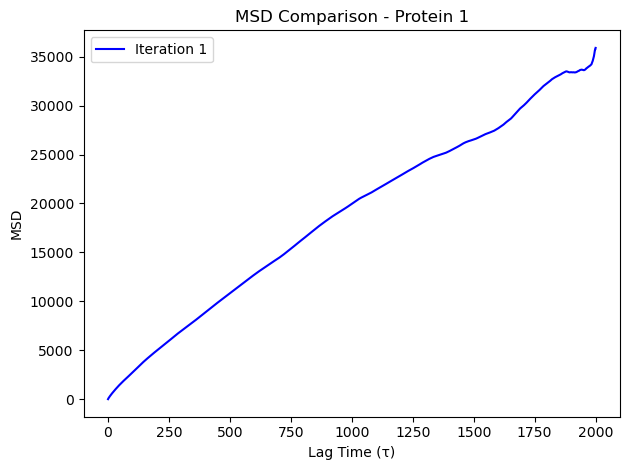

In [4]:
import numpy as np
import matplotlib.pyplot as plt

timestep = 1  # nanoseconds; adjust based on actual time between frames
# Plot each iteration separately
for i in range(1): #change back to 50 if wnat to see all proteins
    nframes2 = MSD_all.n_frames
    lagtimes2 = np.arange(nframes2) * timestep
    fig, ax = plt.subplots()  # Create a new figure and axes for each iteration

    # Plot the current iteration
    # ax.plot(
    #     lagtimes2, 
    #     results[i], 
    #     label=f'Iteration {i + 1}', 
    #     linestyle="-", 
    #     color="red"
    # )
    
    ax.plot(
        lagtimes2, 
        MSD_all.results.timeseries, 
        label=f'Iteration {i + 1}', 
        linestyle="-", 
        color="blue"
    )


    # # Plot the exact result for comparison
    # exact = lagtimes2 * 6  # Replace with the actual expected result
    # ax.plot(lagtimes2, exact, color="black", linestyle="--", label=r'$y=6D\tau$')

    # Add labels, legend, and show plot
    ax.set_xlabel("Lag Time (τ)")
    ax.set_ylabel("MSD")
    ax.legend(loc='upper left')
    ax.set_title(f"MSD Comparison - Protein {i + 1}")
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()  # Display the plot for this iteration

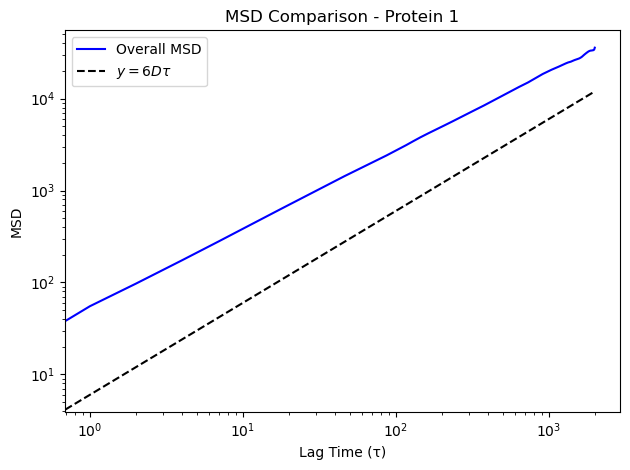

In [5]:
import numpy as np
import matplotlib.pyplot as plt

timestep = 1  # nanoseconds; adjust based on actual time between frames

# Plot each iteration separately
for i in range(1): # to see all proteins change back to 50
    nframes2 = MSD_all.n_frames
    lagtimes2 = np.arange(nframes2) * timestep

    # Create a new figure and axes for each iteration
    fig, ax = plt.subplots()  # Create a new figure and axes
    ax.set_xscale('log')  # Set x-axis to log scale
    ax.set_yscale('log')  # Set y-axis to log scale

    # Plot the current iteration
    # ax.plot(
    #     lagtimes2, 
    #     results[i], 
    #     label=f'Iteration {i + 1}', 
    #     linestyle="-", 
    #     color="red"
    # )
    
    # Plot the overall MSD
    ax.plot(
        lagtimes2, 
        MSD_all.results.timeseries, 
        label='Overall MSD', 
        linestyle="-", 
        color="blue"
    )

    # Plot the exact result for comparison
    exact = lagtimes2 * 6  # Replace with the actual expected result
    ax.plot(lagtimes2, exact, color="black", linestyle="--", label=r'$y=6D\tau$')

    # Add labels, legend, and show plot
    ax.set_xlabel("Lag Time (τ)")
    ax.set_ylabel("MSD")
    ax.legend(loc='upper left')
    ax.set_title(f"MSD Comparison - Protein {i + 1}")
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()  # Display the plot for this iteration